::: {.callout-note appearance="default"}

This report is still under review. 

:::

# Background

The Brexit was a term that refers to the withdrawal of the United Kingdom (UK) from the European Union. It is a combination of *Britain* and *exit*. The country is the sole country to ever left the EU. As Brexit has significant implications to the people of the UK, diversing opinions (positively and negatively) arose with the event. Consequently, there is a polarity among Twitter users which then can be observed by the tweets. This notebook contains exploratory data analysis of a Kaggle dataset: [Brexit Polarity Tweets](https://www.kaggle.com/datasets/visalakshiiyer/twitter-data-brexit). 

The project repository can be accessed [here](https://www.github.com/hanzholahs/brexit-polarity-tweets).


### About the dataset

These datasets were collated as part of a Master's dissertation project. This Twitter dataset covers the January - March 2022 period and comprises tweets relating to Brexit or Europe from Twitter accounts with publicly stated Brexit positions in their bio.

The Boolean search for **pro-Brexit** tweet is:

[(bio:"Brexit support" OR bio:"pro-brexit" OR bio:"pro brexit" OR bio:"Pro #Brexit" OR bio:brexiteer OR bio:probrexit) AND (EU OR Brexit OR CUSTOMS OR EUROPEAN OR EUROPE OR #Remain OR *Brexit OR #rejoinEU)]{style="font-family:Consolas,Monaco,Lucida Console,Liberation Mono,DejaVu Sans Mono,Bitstream Vera Sans Mono,Courier New;font-size:75%"}


The Boolean search for **anti-Brexit** tweet is: 

[(bio:"anti brexit" OR bio:"anti-brexit" OR bio:"antibrexit" OR bio:"Pro remain" OR bio:"pro-remain" OR bio:remainer) AND (EU OR BREXIT OR CUSTOMS OR EUROPEAN OR EUROPE OR #Remain OR *Brexit)]{style="font-family:Consolas,Monaco,Lucida Console,Liberation Mono,DejaVu Sans Mono,Bitstream Vera Sans Mono,Courier New;font-size:75%"}

---

# 1. Environment Setup

For the analysis, several popular data analysis libraries are leveraged. 

* `pandas` for working with dataframes
* `numpy` to provide better ways in performing numerical calculation
* `seaborn` and `matplotlib` for data visualisation
* `datetime` for date time format

In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# 2. Data Preparation

The preparation consists of:

* importing the data for pro- and anti-brexit tweets
* making sure that the data represent the same information based on its coloumns
* concatenating both datasets.

In [331]:
# Import Data
cons = pd.read_csv('C:\\Users\\rosyi\\OneDrive - Bank Indonesia\Desktop\\Data\\Data Coding\\Projects\\Personal Projects\\Sentiment Analysis\\TweetDataset_AntiBrexit_Jan-Mar2022.csv')
pro = pd.read_csv('C:\\Users\\rosyi\\OneDrive - Bank Indonesia\Desktop\\Data\\Data Coding\\Projects\\Personal Projects\\Sentiment Analysis\\TweetDataset_ProBrexit_Jan-Mar2022.csv')

In [332]:
# check if the csv files has the same column types  
print(np.mean(pro.dtypes == cons.dtypes)) # value should be 1
print(np.mean(pro.columns == cons.columns)) # value should be 1

1.0
1.0


In [333]:
# Combine pro and cons file
df = pd.concat([pro, cons], ignore_index = True)
df.head()

,Unnamed: 0,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,...,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags,Status
0,0,15-Jan-2022 11:58PM,NaN,https://twitter.com/dianemcgregor8/statuses/14...,NaN,RT @re11ddy: QT @sandieshoes: Do this if you v...,Twitter,@dianemcgregor8,Cameroon,NaN,...,https://twitter.com/dianemcgregor8,Veggie burger! Lover of all Animals and Nature...,122.0,185.0,"Jan 15, 2022",11:58 PM,North,NaN,NaN,Pro
1,1,15-Jan-2022 11:57PM,NaN,http://twitter.com/DeniseMembery/statuses/1482...,NaN,RT @RickSacrop: Michael Fabricant is absolutel...,Twitter,@DeniseMembery,United Kingdom,NaN,...,http://www.twitter.com/DeniseMembery,"🇬🇧✡️ Proud to be British. 🇬🇧 Animal lover, m...",5721.0,6291.0,"Jan 15, 2022",11:57 PM,England,NaN,NaN,Pro
2,2,15-Jan-2022 11:56PM,NaN,https://twitter.com/007Stirling/statuses/14825...,NaN,@StokieDrew2 I do find it rich; that Tory vote...,Twitter,@007stirling,United Kingdom,NaN,...,https://twitter.com/007Stirling,BRITISH/IRISH/ULSTER-SCOTS PUL\nRIGHT-WING. \n...,7219.0,7433.0,"Jan 15, 2022",11:56 PM,Northern Ireland,Belfast,NaN,Pro
3,3,15-Jan-2022 11:54PM,NaN,https://twitter.com/UKleadstheworld/statuses/1...,NaN,RT @denistmurray: Brexit Britain win as London...,Twitter,@ukleadstheworld,United Kingdom,NaN,...,https://twitter.com/UKleadstheworld,"GB News, Conservatives, Brexiteer, Block all ads.",700.0,1014.0,"Jan 15, 2022",11:54 PM,NaN,NaN,NaN,Pro
4,4,15-Jan-2022 11:53PM,NaN,https://twitter.com/paul_beamish/statuses/1482...,NaN,@afneil If Johnson is taken down by The Tories...,Twitter,@paul_beamish,United Kingdom,NaN,...,https://twitter.com/paul_beamish,Brexiteer and Shipbuilder (Plater/Welder) livi...,200.0,822.0,"Jan 15, 2022",11:53 PM,England,NaN,NaN,Pro


# 3. Data Cleansing

The cleansing process encompasses the selection of which columns to keep, the inputation of null values, and the removal of outliers. The final columns to be used in the analysis are specified through removing of columns with a large proportion of `NaN` (i.e., more than 50 percent). It is also important to ensure the relevant names for each data represented by all columns. Null values are replaced by the modes of the data based on its column. Outliers are defined arbitrarily with regards to the distribution of a given variable.

## 3.1 Variable selection

In [334]:
# delete columns that have nan value over 50%
cols_to_delete = df.columns[df.isnull().sum()/len(df) > .50]
df.drop(cols_to_delete, axis = 1, inplace = True)

# rename the first column as ID
df = df.rename(columns={'Unnamed: 0': 'ID'})

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358205 entries, 0 to 358204
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     358205 non-null  int64  
 1   Date                   358205 non-null  object 
 2   URL                    358205 non-null  object 
 3   Hit Sentence           358205 non-null  object 
 4   Source                 358205 non-null  object 
 5   Influencer             358205 non-null  object 
 6   Country                358205 non-null  object 
 7   Language               358205 non-null  object 
 8   Reach                  358205 non-null  int64  
 9   Desktop Reach          358205 non-null  int64  
 10  Mobile Reach           358205 non-null  int64  
 11  National Viewership    358205 non-null  int64  
 12  AVE                    358205 non-null  float64
 13  Sentiment              358205 non-null  object 
 14  Key Phrases            313001 non-nu

There are variables that still have null values under 50%, which are:
- Key Phrases
- Twitter Authority
- Twitter Followers
- Twitter Following
- State

So, we have to clean the variables again.

## 3.2. `state` variable

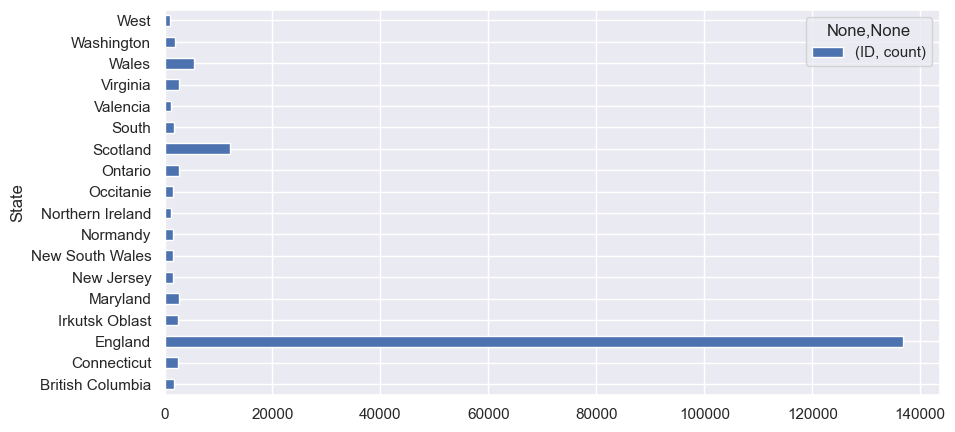

In [336]:
# see the distribution of state for knowing what should we deal with null values.
state = df.groupby(['State']).agg({'ID':['count']})
filter_state = state[state[('ID','count')]/sum(state[('ID','count')]) > .005]
filter_state.plot(kind='barh',figsize=(10,5))

plt.show()

In [337]:
#fill null values in state with modes
df['State'].fillna(df['State'].mode()[0],inplace=True)

## 3.3. `Twitter Authority`, `Twitter Followers`, and `Twitter Following`

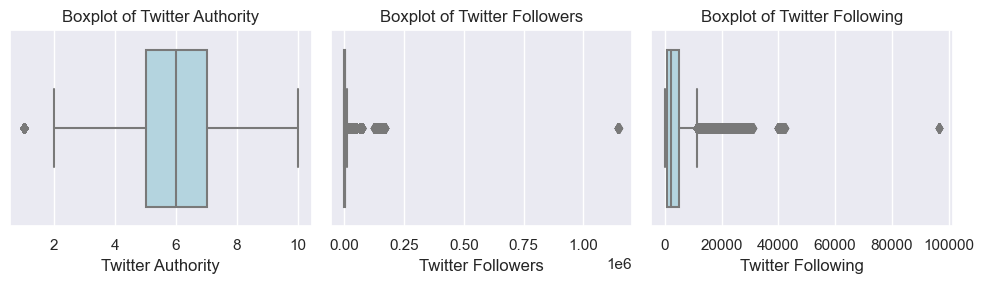

In [338]:
# see the distribution of twitter authority data, twitter followers data, and twitter following data using boxplot for knowing what should we deal with outliers and null values.
feature = df[['Twitter Authority','Twitter Followers','Twitter Following']]

plt.figure(figsize=(10,3))
list_of_column=feature.columns

for i in range(len(list_of_column)):
    plt.subplot(1,3,i+1)
    sns.boxplot(x = feature[list_of_column[i]],data=feature,color='lightblue')
    plt.title('Boxplot of {}'.format(list_of_column[i]))
    plt.tight_layout()
plt.show()

In [339]:
# Remove outliers
df = df[df['Twitter Following']<900000]
df = df[df['Twitter Following']<90000]
df = df[df['Twitter Authority']>1.5]

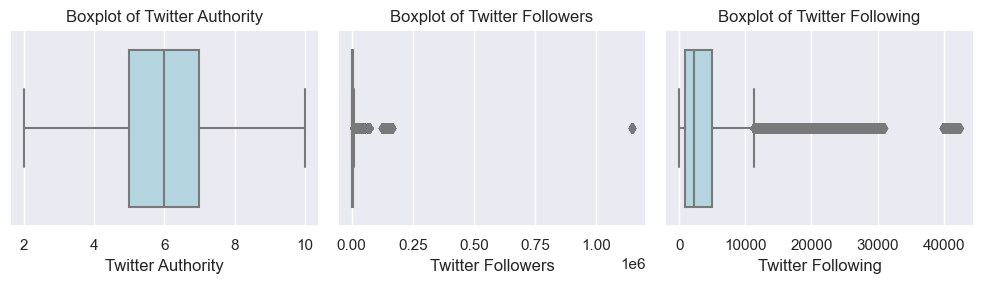

In [340]:
# Check again the twitter authority data, twitter followers data, and twitter following data using boxplot
feature = df[['Twitter Authority','Twitter Followers','Twitter Following']]

plt.figure(figsize=(10,3))
list_of_column=feature.columns

for i in range(len(list_of_column)):
    plt.subplot(1,3,i+1)
    sns.boxplot(x = feature[list_of_column[i]],data=feature,color='lightblue')
    plt.title('Boxplot of {}'.format(list_of_column[i]))
    plt.tight_layout()
plt.show()

In [341]:
# fill Twitter Authority nan values with mean
df['Twitter Authority'].fillna(df['Twitter Authority'].mean(),inplace=True)
# fill Twitter Following and Following with median
df['Twitter Following'].fillna(df['Twitter Followers'].median(),inplace=True)
df['Twitter Following'].fillna(df['Twitter Following'].median(),inplace=True)

## 3.4. Dates and time

In [342]:
df.drop(['Date'],axis=1,inplace=True) #drop date because there is duplicate date's data

df['Dates'] = pd.to_datetime(df['Alternate Date Format']) #Create Dates variable and change the format of date time 
df.drop(['Alternate Date Format'],axis=1,inplace=True) #drop existing date variable

df['Time'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M:%S') #Change the format of time

## 3.5. Clean data

In [343]:
df.iloc[1,: ] #Check again the clean data

ID                                                                     1
URL                    http://twitter.com/DeniseMembery/statuses/1482...
Hit Sentence           RT @RickSacrop: Michael Fabricant is absolutel...
Source                                                           Twitter
Influencer                                                @DeniseMembery
Country                                                   United Kingdom
Language                                                         English
Reach                                                               5721
Desktop Reach                                                          0
Mobile Reach                                                           0
National Viewership                                                    0
AVE                                                                52.92
Sentiment                                                       Negative
Key Phrases                                        

# 4. Exploratory Data Analysis

## 4.1. Engagement
Engagement can shown from Twitter Authority Score and Average Engagement (AVE), with Twitter Authority Score can helps to find, optimize, and engage Twitter audience.

In [344]:
# Create a dataframe that show about the relationship between Twitter Authority Score and AVE 
effectiveness = df.groupby(['Twitter Authority']).agg({'AVE':['mean']})
effectiveness.reset_index(inplace=True)
effectiveness['mean_AVE'] = effectiveness[('AVE','mean')]
effectiveness.drop([('AVE','mean')],axis=1, inplace=True)
effectiveness = effectiveness.sort_values(by=['mean_AVE'],ascending=False)
effectiveness['%AVE'] = (effectiveness['mean_AVE']/sum(effectiveness['mean_AVE']))*100
effectiveness

,Twitter Authority,mean_AVE,%AVE
,,,
8,10.0,1662.586714,71.661990
7,9.0,421.228801,18.156102
6,8.0,159.627375,6.880372
5,7.0,50.260745,2.166374
4,6.0,17.842000,0.769039
3,5.0,5.546803,0.239082
2,4.0,1.968369,0.084842
1,3.0,0.712275,0.030701
0,2.0,0.266753,0.011498


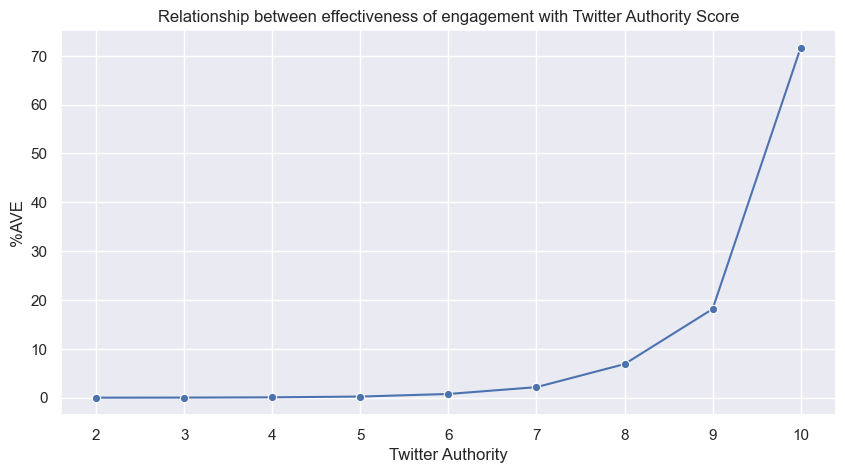

In [345]:
# From dataframe above, create a visualization for easier analysis 
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(data=effectiveness,y = '%AVE',x = 'Twitter Authority',marker='o')

plt.title('Relationship between effectiveness of engagement with Twitter Authority Score')
plt.show()

In [346]:
#Create Dataframe that shown the relationship of twitter following and twitter followers with the engagement 

#Dataframe for Twitter Following
effectiveness_1 = df.groupby(['Twitter Authority']).agg({'Twitter Following':['mean']})
effectiveness_1.reset_index(inplace=True)
effectiveness_1['mean_Following'] = effectiveness_1[('Twitter Following','mean')]
effectiveness_1.drop([('Twitter Following','mean')],axis=1, inplace=True)
effectiveness_1 = effectiveness_1.sort_values(by=['mean_Following'],ascending=True)
effectiveness_1['(%)Following'] = (effectiveness_1['mean_Following']/sum(effectiveness_1['mean_Following']))*100
effectiveness_1


,Twitter Authority,mean_Following,(%)Following
,,,
0,2.0,164.774230,0.327141
1,3.0,228.294343,0.453253
2,4.0,492.780037,0.978361
3,5.0,972.448868,1.930690
4,6.0,2662.141628,5.285390
8,10.0,3612.857143,7.172931
5,7.0,5475.135423,10.870280
6,8.0,16787.418629,33.329576
7,9.0,19972.082398,39.652377


In [347]:
#Dataframe for Twitter Followers
effectiveness_2 = df.groupby(['Twitter Authority']).agg({'Twitter Followers':['mean']})
effectiveness_2.reset_index(inplace=True)
effectiveness_2['mean_Followers'] = effectiveness_2[('Twitter Followers','mean')]
effectiveness_2.drop([('Twitter Followers','mean')],axis=1, inplace=True)
effectiveness_2 = effectiveness_2.sort_values(by=['mean_Followers'],ascending=True)
effectiveness_2['(%)Followers'] = (effectiveness_2['mean_Followers']/sum(effectiveness_2['mean_Followers']))*100

effectiveness_2

,Twitter Authority,mean_Followers,(%)Followers
,,,
0,2.0,28.837242,0.011497
1,3.0,77.002494,0.030701
2,4.0,212.771106,0.084832
3,5.0,599.652220,0.239081
4,6.0,1928.856320,0.769036
5,7.0,5433.582013,2.166371
6,8.0,17256.996735,6.880369
7,9.0,45538.227132,18.156103
8,10.0,179739.060714,71.662010


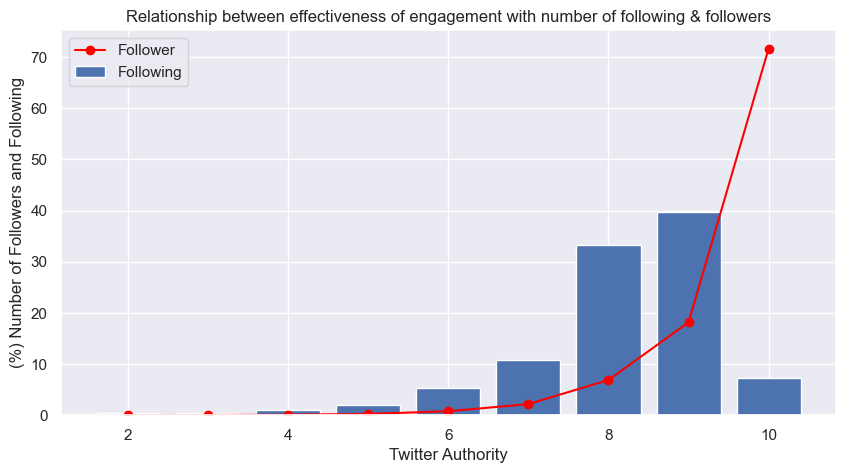

In [348]:
# From dataframe above, create a visualization for easier analysis 
plt.figure(figsize=(10,5))

plt.bar(effectiveness_1['Twitter Authority'], effectiveness_1['(%)Following'],label='Following')
plt.plot(effectiveness_2['Twitter Authority'], effectiveness_2['(%)Followers'],c='red',label='Follower',marker='o')

plt.legend()
plt.xlabel('Twitter Authority')
plt.ylabel('(%) Number of Followers and Following')
plt.title('Relationship between effectiveness of engagement with number of following & followers')
plt.show()

##### Conclusion
- Effectiveness of engagement can be shown with Twitter Authority, and it has strong relationship with Average Engagement (AVE). So, we can interpret the engagement or the effectiveness of tweets by using Twitter Authority
- More numbers of followers shown that the twitter's user have more engagement too. Slightly different from following number interpretation, number of following that have for about 3613 following have the most engagement.

## 4.2. Anti and Pro Tweets

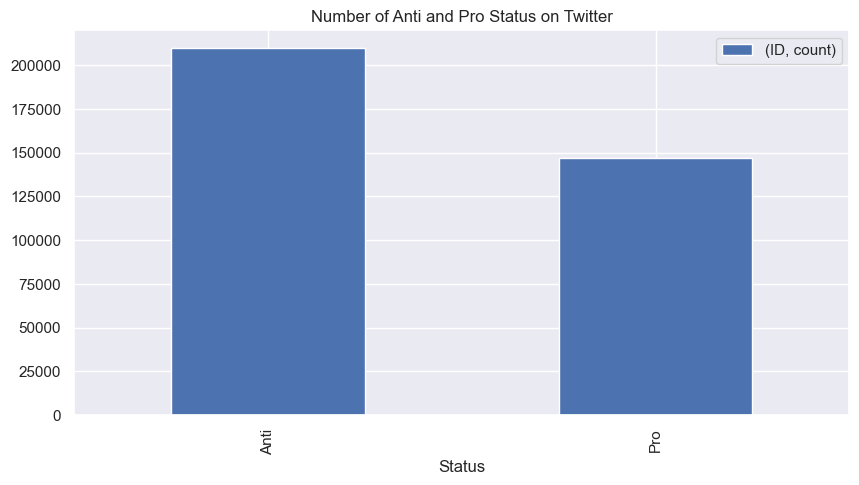

In [349]:
# Create visualization of number of pro's and anti's tweets
df.groupby(['Status']).agg({'ID':['count']}).plot(kind='bar',figsize=(10,5)) 

plt.legend()
plt.title('Number of Anti and Pro Status on Twitter')
plt.show()

In [350]:
# Create dataframe about the count of tweets each day
status = df.groupby(['Dates','Status']).agg({'ID':['count']})
status.reset_index(inplace=True)
status['count'] = status[('ID','count')]
status.drop([('ID','count')],axis=1, inplace=True)

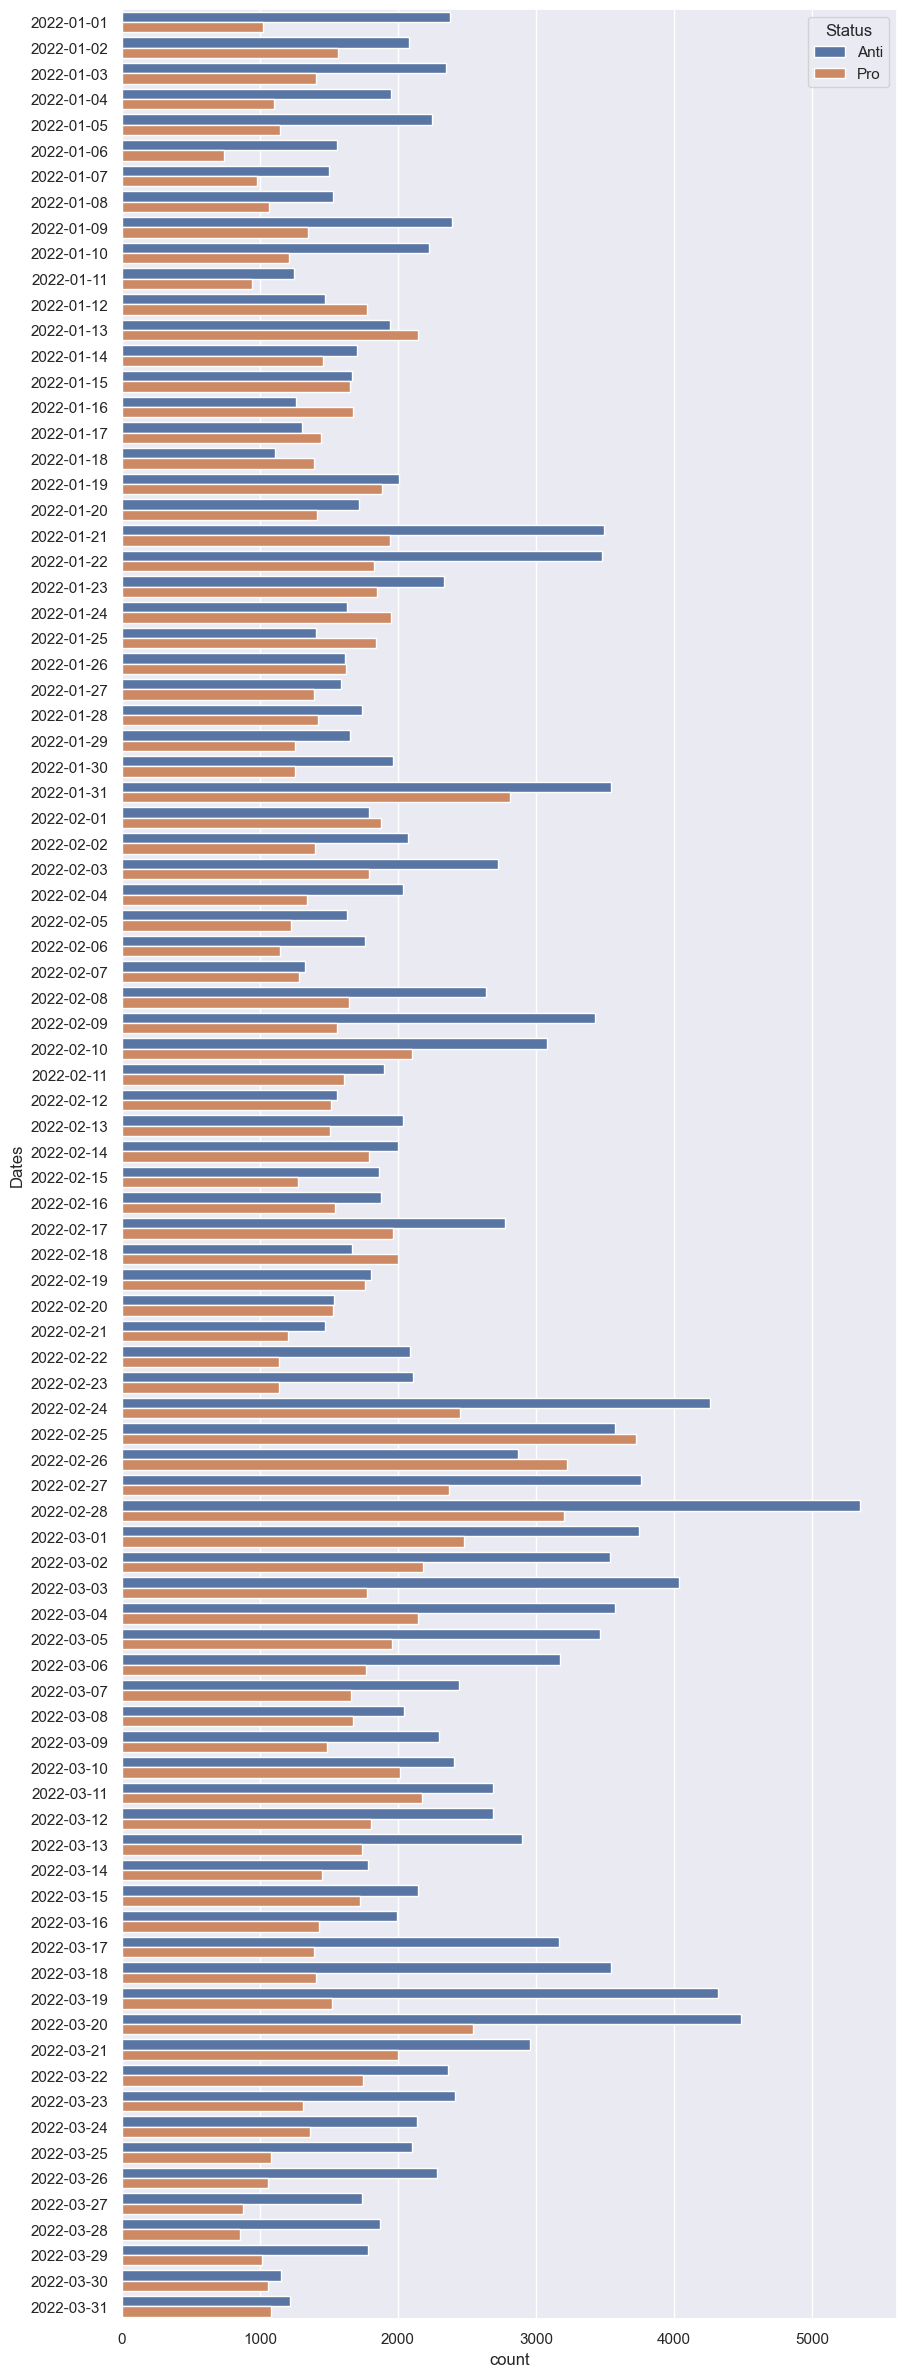

In [351]:
# From dataframe above, create a visualization for easier analysis 
fig, ax = plt.subplots(figsize = (10,30))   
plot = sns.barplot(data=status,x ='count' ,y = 'Dates',hue='Status', ax=ax)

y_dates = status['Dates'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_yticklabels(labels=y_dates, rotation=0, ha='right')

plt.show()

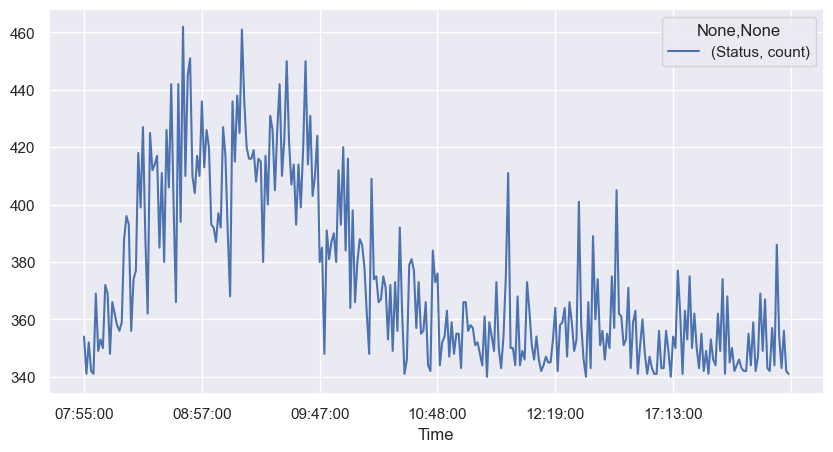

In [352]:
# Create dataframe about the count of tweets every single time
time = df.groupby(['Time'],as_index=False).agg({'Status':['count']}).sort_values(by=[('Status','count')],ascending=False)
time_desc = time.head(300)
time_desc = time_desc.sort_values(by=['Time'],ascending=True)

# From dataframe above, create a visualization for easier analysis 
time_desc = time_desc.set_index('Time')
time_desc.plot(figsize=(10,5))
plt.show()

In [353]:
# Create dataframe about pro's and anti's tweet from every country
status_1 = df.groupby(['Country','Status']).agg({'ID':['count']})
status_1.reset_index(inplace=True)
status_1['count'] = status_1[('ID','count')]
status_1.drop([('ID','count')],axis=1, inplace=True)
status_1 = status_1.sort_values(by=['count'],ascending=False)
status_1 = status_1.head(12)

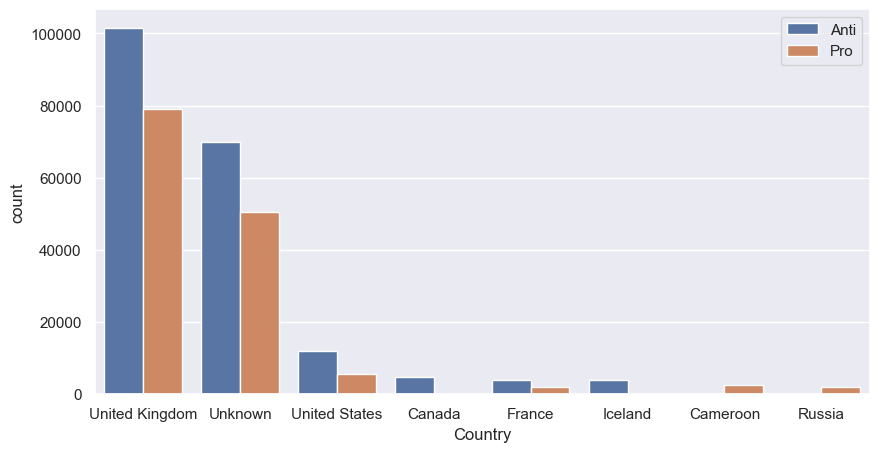

In [354]:
# From dataframe above, create a visualization for easier analysis 
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=status_1,y = 'count',x = 'Country', hue='Status')

plt.legend(loc='best')
plt.show()

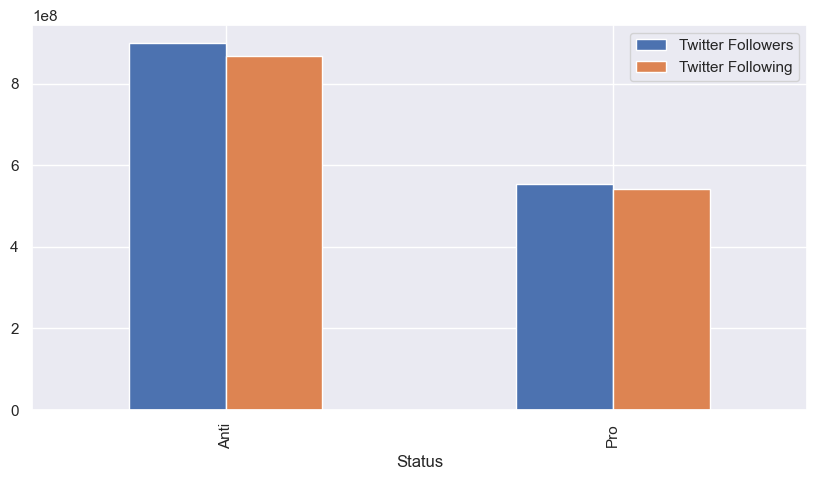

In [355]:
# Create visualization about the relationship between number of followers and following with the status of the tweets. 
df.groupby('Status').agg({'Twitter Followers':'sum','Twitter Following':'sum'}).plot(kind ='bar' ,figsize=(10,5))
plt.show()

In [356]:
# Create dataframe about the devices that is used for using twitter 
status_2 = df.groupby(['Twitter Client','Status']).agg({'ID':['count']})
status_2.reset_index(inplace=True)
status_2['count'] = status_2[('ID','count')]
status_2.drop([('ID','count')],axis=1, inplace=True)
status_2 = status_2.sort_values(by=['count'],ascending=False)
status_2 = status_2.head(8)

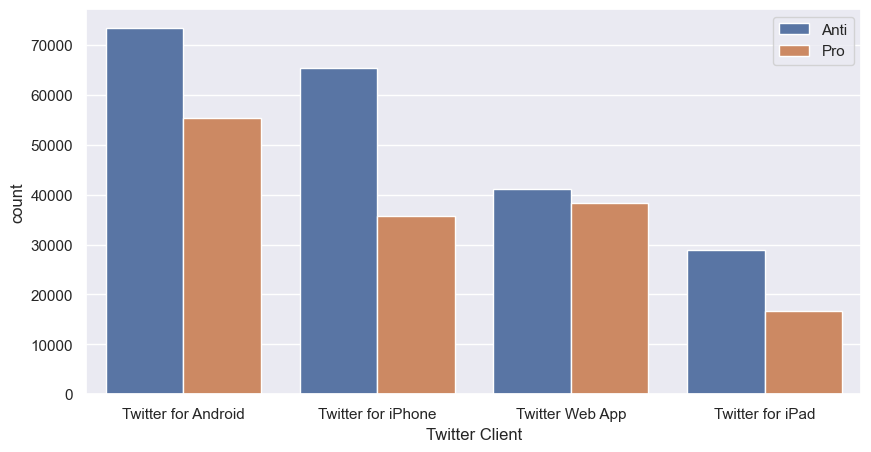

In [357]:
# From dataframe above, create a visualization for easier analysis 
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=status_2,y = 'count',x = 'Twitter Client', hue='Status')

plt.legend(loc='best')
plt.show()

In [358]:
# Create dataframe that shown us the relationship of the engagement between anti's and pro's tweets
status_3 = df.groupby(['Twitter Authority','Status']).agg({'ID':['count']})
status_3.reset_index(inplace=True)
status_3['count'] = status_3[('ID','count')]
status_3.drop([('ID','count')],axis=1, inplace=True)
status_3 = status_3.sort_values(by=['count'],ascending=False)

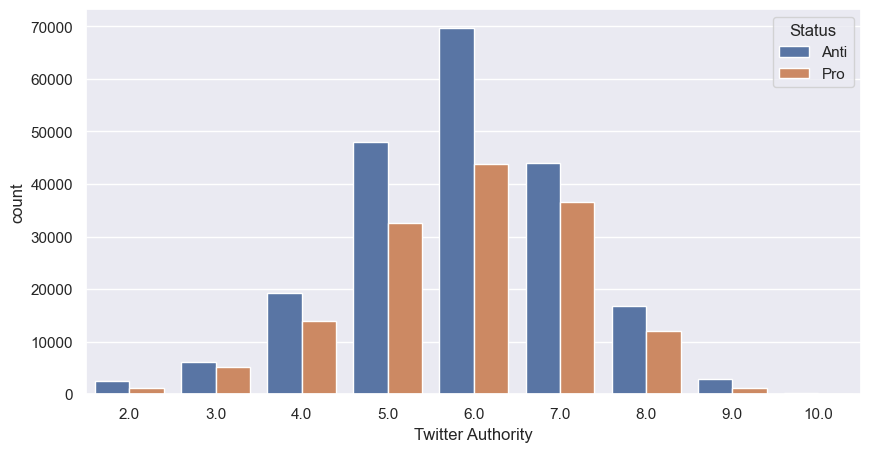

In [359]:
# From dataframe above, create a visualization for easier analysis 
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=status_3,y = 'count',x = 'Twitter Authority', hue='Status')
plt.show()

#### Conclusion
- There are more Anti-tweets than Pro-tweets from over the world, it shown us that more people disagree about the Brexit. 
- Most tweets were on 2022-02-28, with:
    - Most Pro's Tweets: 2022-02-25
    - Most Anti's Tweets: 2022-02-28
    - Most Tweets came from UK, Unknown, and united States
- Pro's and Anti's tweets were usually done in the range of 8:15 AM to 10.00 AM which is a normal time for young people to use twitter.
- User that have more numbers of followers and following, tweets more about Anti Brexit than user that have few number followers and following.
- Twitter's users mostly use Android, iPhone, Web App, and Ipad. It is shown us too that people from UK, United States, Canada, France, and another country in this data more likely to use Android rather than iPhone.
- Most Anti's and Pro's tweets come from user that has score of twitter authority = 6, and the pattern of relationship between Status and Twitter Authority create normal distribution which shown us that the data near the mean are more frequent in occurrence than data far from the mean. So, the tweets of anti and pro are average on engaging the twitter users.

In [360]:
df.groupby(['Keywords']).agg({'ID':['count']}).sort_values(by=[('ID','count')],ascending=False)

,ID
,count
Keywords,
Brexit,95164
EU,82975
Europe,27932
European,14414
"Brexit,EU",11299
...,...
"brexitbritain,European,Europe,BrexitBritain",1
"brexitbritain,European,brexit,EU,Brexit,BrexitBritain",1


In [361]:
df = df.drop(['URL','Hit Sentence','User Profile Url','Twitter Bio','Influencer','Source','Input Name','Tweet Id','Time','Twitter Screen Name','Key Phrases','Keywords','Dates','Desktop Reach','Mobile Reach','National Viewership'], axis=1) #drop variable that only has 1 value

In [362]:
# See the balance of the binary data
df['Status'].value_counts()

Anti    209497
Pro     146672
Name: Status, dtype: int64

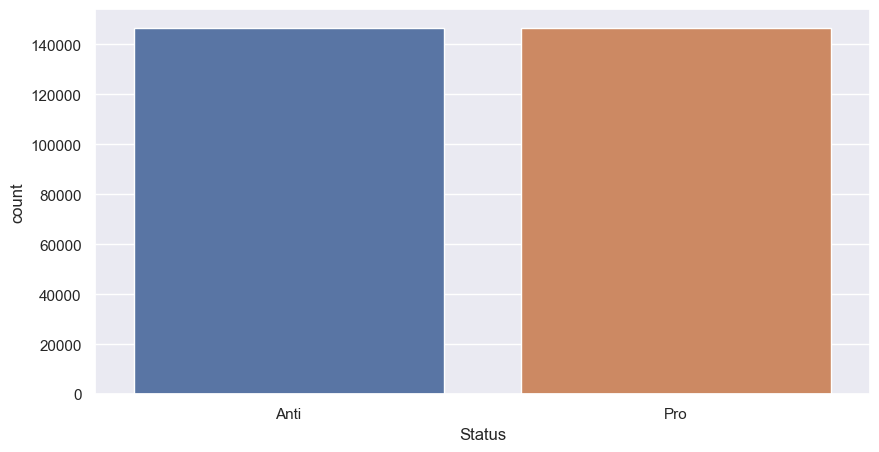

In [363]:
# Menyeimbangkan jumlah 0 dan 1 pada label dengan minority class
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['Status']=='Anti')] 
df_minority = df[(df['Status']=='Pro')] 
# downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 146672, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_balance = pd.concat([df_majority_downsampled, df_minority])

# Check the data after balancing
sns.countplot(df_balance['Status'])
plt.show()

In [364]:
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293344 entries, 270179 to 147630
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 293344 non-null  int64  
 1   Country            293344 non-null  object 
 2   Language           293344 non-null  object 
 3   Reach              293344 non-null  int64  
 4   AVE                293344 non-null  float64
 5   Sentiment          293344 non-null  object 
 6   Twitter Authority  293344 non-null  float64
 7   Twitter Id         293344 non-null  float64
 8   Twitter Client     293344 non-null  object 
 9   Twitter Followers  293344 non-null  float64
 10  Twitter Following  293344 non-null  float64
 11  State              293344 non-null  object 
 12  Status             293344 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 31.3+ MB


In [365]:
df_balance = pd.get_dummies(df_balance, columns=['Country','Language','Sentiment','Twitter Client','State'])

In [366]:
df_balance['Status'] = df_balance['Status'].eq('Anti').mul(1)

In [367]:
# df_balance.to_csv('C:\\Users\\rosyi\\Downloads\\cek.csv')

## 5. Modelling

## 5.1. Split Data

In [368]:
X = df_balance.loc[ :, df_balance.columns != 'Status']
y = df_balance['Status']

In [369]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [370]:
# Melihat dimensi dari data yang digunakan untuk pemodelan
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(234675, 266)
(234675,)
(58669, 266)
(58669,)


## 5.1. Data Processing

In [371]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
dtree = tree.DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
knn = KNeighborsClassifier()

In [372]:
models = [lr,dtree,rf,knn]
name_models = ('Logistic Regression','Decision Tree', 'Random Forest Classifier', 'Knearest Neighbor')
pred = [ ]

In [373]:
# Accuracy
from sklearn.metrics import accuracy_score

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    pred_train = models[i].predict(X_train)
    pred_val = models[i].predict(X_test)
    print(name_models[i])
    accuracy_train = (accuracy_score(y_train, pred_train))
    accuracy_val = (accuracy_score(y_test, pred_val))
    print('Accuracy Train: ',accuracy_train)
    print('Accuracy Validation: ',accuracy_val)
    print(' ')

Logistic Regression
Accuracy Train:  0.500504953659316
Accuracy Validation:  0.497980193969558
 
Decision Tree
Accuracy Train:  1.0
Accuracy Validation:  0.9953979103103854
 
Random Forest Classifier
Accuracy Train:  1.0
Accuracy Validation:  0.9888527160851557
 
Knearest Neighbor
Accuracy Train:  0.8818323212954086
Accuracy Validation:  0.8812660860079429
 


## 5.2. Hyperparameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

### 5.2.1. Logistic Regression

In [44]:
grid={
    "C":np.logspace(-3,3,7), 
    "penalty":["l1","l2"] # l1 lasso l2 ridge
}

In [45]:
lr_cv=GridSearchCV(estimator=lr,
                    param_grid=grid,
                    cv=10)
lr_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [46]:
lr_HT = lr_cv.best_estimator_
lr_HT.fit(X_train,y_train)
lr_best = lr_HT.predict(X_test)

### 5.2.2. Decision Tree

In [47]:
params = {
        'max_leaf_nodes': list(range(2, 75)), 
        'min_samples_split': list(range(1, 4)),
        'max_features': ['auto', 'sqrt']
}

In [48]:
DT_cv = GridSearchCV(estimator=dtree, 
                    param_grid=params, 
                    verbose=1, cv=3)
DT_cv.fit(X_train, y_train)

Fitting 3 folds for each of 438 candidates, totalling 1314 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [1, 2, 3]},
             verbose=1)

In [49]:
tree_HT = DT_cv.best_estimator_
tree_HT.fit(X_train, y_train)
tree_best = tree_HT.predict(X_test)

### 5.2.3. Random Forest

In [50]:
params = {
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
}

In [51]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 1980 candidates, totalling 7920 fits


In [ ]:
rf_HT = grid_search.best_estimator_
rf_HT.fit(X_train, y_train)
rf_best = rf_HT.predict(X_test)

### 5.2.4. Knearest Neighbor

In [ ]:
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

In [ ]:
grid = GridSearchCV(estimator=knn, 
                    param_grid=param_grid, 
                    cv=10, scoring='accuracy', 
                    return_train_score=False,verbose=1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [ ]:
knn_HT = grid.best_estimator_
knn_HT.fit(X_train,y_train)
knn_best = knn_HT.predict(X_test)

## 5.3. Evaluation

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
ht = [lr_best,tree_best,rf_best,knn_best]
name_models = ('Logistic Regression:','Decision Tree:', 'Random Forest Classifier:', 'Knearest Neighbor:')

In [ ]:
#Accuracy
for i in range(len(ht)):
    print('Accuracy of {}'.format(name_models[i]),(accuracy_score(y_test,ht[i])))
    # print((accuracy_score(y_test,ht[i])))
print(' ')    

#Precision
for i in range(len(ht)):
    print('Precision {}'.format(name_models[i]),(precision_score(y_test,ht[i],average='macro')))
    # print((precision_score(y_test,ht[i],average='macro')))
print(' ') 

#Recall
for i in range(len(ht)):
    print('Recall Score of {}'.format(name_models[i]),(recall_score(y_test,ht[i],average='macro')))
    # print((recall_score(y_test,ht[i],average='macro')))

Accuracy of Logistic Regression: 0.497980193969558
Accuracy of Decision Tree: 0.8240126813138113
Accuracy of Random Forest Classifier: 0.8598067122330362
Accuracy of Knearest Neighbor: 0.8827830711278528
 
Precision Logistic Regression: 0.248990096984779
Precision Decision Tree: 0.8240633667764565
Precision Random Forest Classifier: 0.8615223186858996
Precision Knearest Neighbor: 0.8834330507206294
 
Recall Score of Logistic Regression: 0.5
Recall Score of Decision Tree: 0.8239856411754314
Recall Score of Random Forest Classifier: 0.8599461977431956
Recall Score of Knearest Neighbor: 0.8827006663232627
